In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Wedge, Rectangle, Polygon
from matplotlib.collections import PatchCollection
plt.rcParams['font.sans-serif'] = ['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号

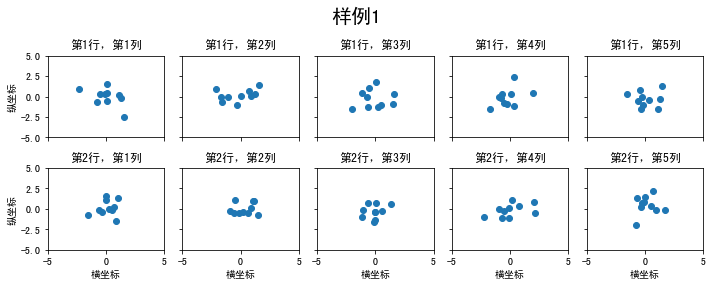

In [2]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('样例1', size=20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('第%d行，第%d列'%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_ylabel('纵坐标')
fig.tight_layout()

In [5]:
print(matplotlib.matplotlib_fname())

/opt/conda/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


In [12]:
ls -l /opt/conda/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc

-rw-rw-r-- 1 jovyan users 40691 May  3 20:27 /opt/conda/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


In [13]:
matplotlib.get_cachedir()

'/home/jovyan/.cache/matplotlib'

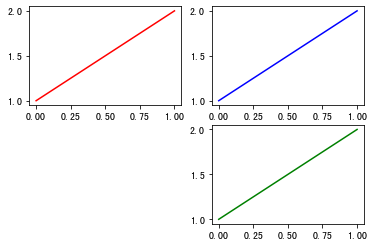

In [3]:
plt.figure()
# 子图1
plt.subplot(2,2,1) 
plt.plot([1,2], 'r')
# 子图2
plt.subplot(2,2,2)
plt.plot([1,2], 'b')
#子图3
plt.subplot(224)  # 当三位数都小于10时，可以省略中间的逗号，这行命令等价于plt.subplot(2,2,4) 
plt.plot([1,2], 'g');

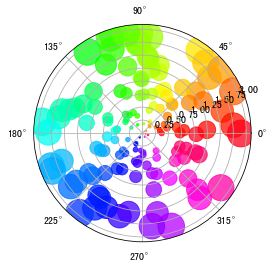

In [4]:
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta


plt.subplot(projection='polar')
plt.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75);

(-6.0, 6.0)

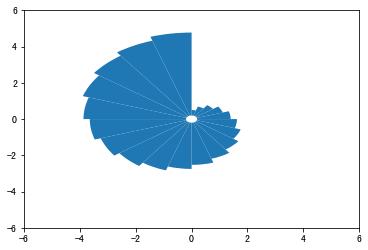

In [5]:
N = 21
r = np.linspace(0.5, 5, 21)
theta = np.arange(0, 361, 18)
colors = 2 * np.pi * np.random.rand(N)

fig = plt.figure()
ax = plt.subplot()

for i in range(20):
    ax.add_patch(Wedge(center=(0,0), r=r[i], theta1=90 - theta[i + 1], theta2=90 - theta[i], width=r[i] - 0.2))

ax.set_ylim(-6, 6)
ax.set_xlim(-6, 6)

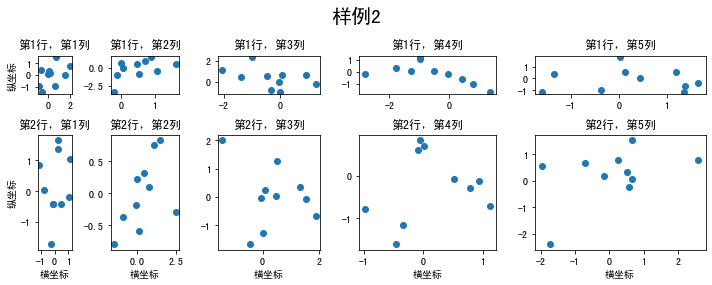

In [109]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[1,2,3,4,5], height_ratios=[1,3])
fig.suptitle('样例2', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title('第%d行，第%d列'%(i+1,j+1))
        if i==1: ax.set_xlabel('横坐标')
        if j==0: ax.set_ylabel('纵坐标')
fig.tight_layout()

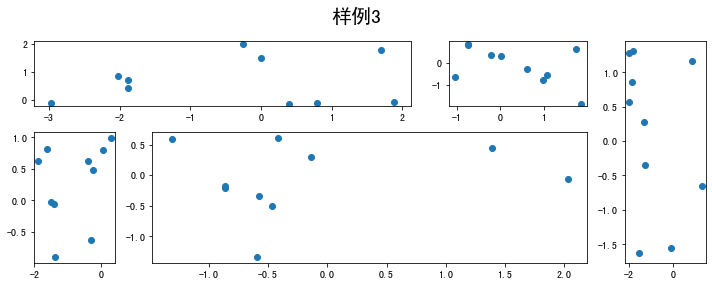

In [6]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[2,2.5,3,1,1.5,2], height_ratios=[1,2])
fig.suptitle('样例3', size=20)
# sub1
ax = fig.add_subplot(spec[0, :3])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax = fig.add_subplot(spec[0, 3:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 0])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
fig.tight_layout()

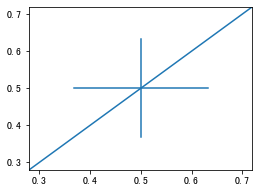

In [7]:
fig, ax = plt.subplots(figsize=(4,3))
ax.axhline(0.5,0.2,0.8)
ax.axvline(0.5,0.2,0.8)
ax.axline([0.3,0.3],[0.7,0.7]);

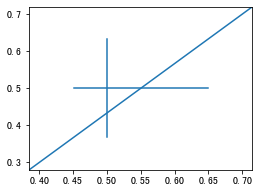

In [13]:
fig, ax = plt.subplots(figsize=(4,3))
ax.axhline(0.5,0.2,0.8)
ax.axvline(0.5,0.2,0.8)
ax.axline([0.4,0.3],[0.7,0.7]);

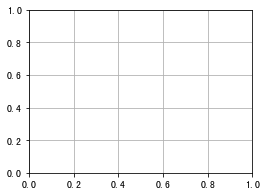

In [14]:
fig, ax = plt.subplots(figsize=(4,3))
ax.grid(True)

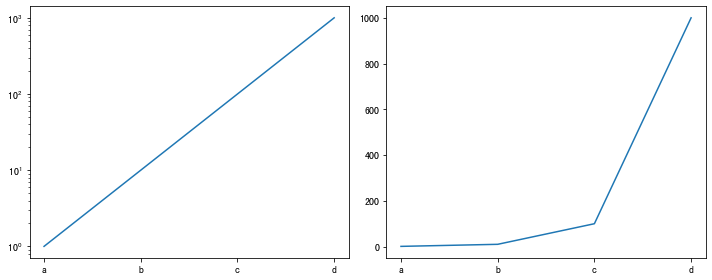

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for j in range(2):
    axs[j].plot(list('abcd'), [10**i for i in range(4)])
    if j==0:
        axs[j].set_yscale('log')
    else:
        pass
fig.tight_layout()


## 思考题

- 墨尔本1981年至1990年的每月温度情况  

数据集来自github仓库下data/layout_ex1.csv  
请利用数据，画出如下的图：

<img src="https://s1.ax1x.com/2020/11/01/BwvCse.png" width="800" align="bottom" />





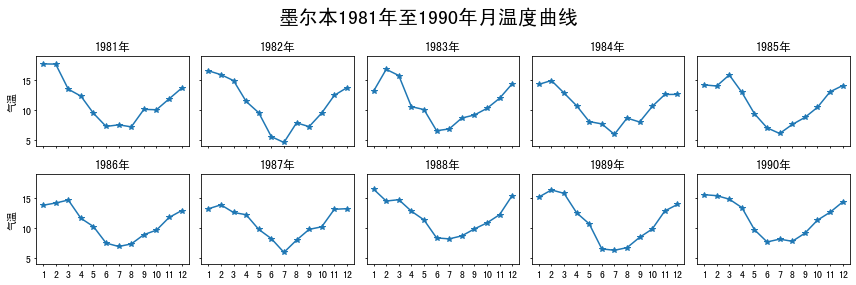

In [90]:
lay_data = pd.read_csv('./data/layout_ex1.csv')
fig, axs = plt.subplots(2, 5, figsize=(12, 4), sharex=True, sharey=True)
fig.suptitle('墨尔本1981年至1990年月温度曲线', size=20)
x = np.linspace(1, 12, 12)
for i in range(10):
    ax = axs[i // 5, i % 5]
    ax.plot(x, lay_data[i * 12 : (i + 1) * 12]['Temperature'], marker='*')
    ax.set_title(str(1981 + i) + '年')
    if i % 5 == 0: ax.set_ylabel('气温')
    # ax.set_ylim(4, 19)
    # ax.set_xticks(x)
    ax.xaxis.set_major_locator(plt.MultipleLocator(1)) #设置x轴刻度间隔
    ax.xaxis.set_tick_params(size=2)                   #设置x轴刻度线长度
    ax.yaxis.set_major_locator(plt.MultipleLocator(5)) #设置y轴刻度间隔
    ax.yaxis.set_tick_params(size=2) 
fig.tight_layout()
plt.show()

In [61]:
year = pd.to_datetime(lay_data['Time']).dt.year


-  画出数据的散点图和边际分布

用 `np.random.randn(2, 150)` 生成一组二维数据，使用两种非均匀子图的分割方法，做出该数据对应的散点图和边际分布图

<img src="https://s1.ax1x.com/2020/11/01/B0pEnS.png" width="400" height="400" align="bottom" />

In [69]:
data = np.random.randn(2, 150)

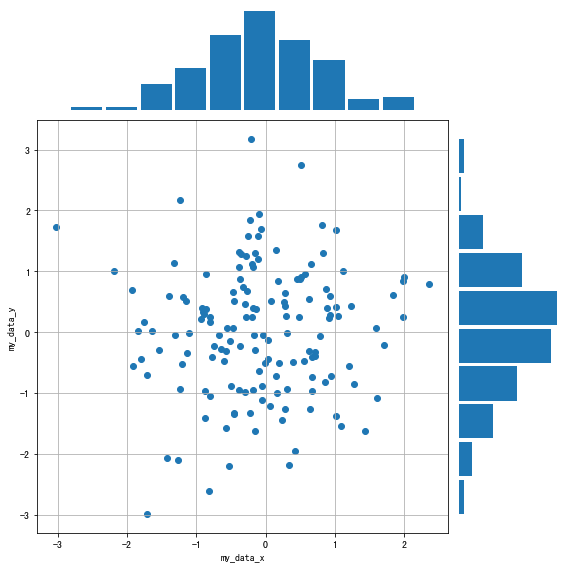

In [102]:
fig = plt.figure(figsize=(8, 8))
spec = fig.add_gridspec(2, 2, width_ratios=[4, 1], height_ratios=[1,4])

interval = np.arange(-3.5, 4, 0.5)

ax1 = fig.add_subplot(spec[0, 0])
ax1.hist(data[0], rwidth=0.9)
ax1.set_xmargin(0.1)
ax1.axis('off')

ax2 = fig.add_subplot(spec[1, 0])
ax2.scatter(data[0], data[1])
ax2.set_ylabel('my_data_y')
ax2.set_xlabel('my_data_x')
ax2.grid(True)

ax3 = fig.add_subplot(spec[1, 1])
ax3.hist(data[1], rwidth=0.9, orientation=u'horizontal')
ax3.axis('off')
# ax3.set_xticks()

fig.tight_layout()
plt.show()

In [74]:
np.arange(-3, 3.5, 0.5)

array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5,  3. ])